### While teaching my 11 year old son about probability I asked him how many times would the sequence (0,1,2,...,9) appear in a random sequence of length 1,000,000? For those of you who know a little probability theory this is a simple problem...
### This notebook demonstrates sequence matching using numpy. As a bonus, it also shows how to do a polynomial fit in numpy.

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

## Generating an array of random digits and sanity check

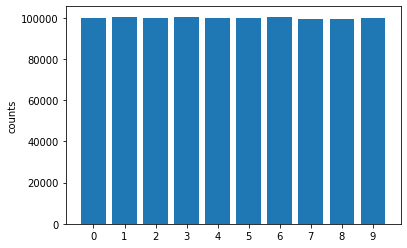

In [2]:
seq_len = 1_000_000
arr = np.random.randint(low=0, high=10, size=seq_len)
counts = sorted(Counter(arr).items())
number, count = zip(*counts)
fig, ax = plt.subplots()
ax.bar(number, count)
ax.set_xticks(number)
plt.ylabel('counts')
plt.show()

## The heart of the sequence matching is done by creating a 2D array of slices generated by sliding a window. The second part is comparing each slice with the desired sequence.

In [3]:
# adapted from: https://stackoverflow.com/questions/36522220/searching-a-sequence-in-a-numpy-array
def search_sequence_numpy(arr,seq):

    Na, Nseq = arr.size, seq.size
    r_seq = np.arange(Nseq)
    n_matches = sum((arr[np.arange(Na-Nseq+1)[:,None] + r_seq] == seq).all(1))
    return n_matches

### Checking matches of different lengths i.e. (0), (0,1), (0,1,2),...,(0,1,2,3,4,5,6,7,8,9) 

In [4]:
n_matches = []
for n in range(1, 10):
    seq = np.arange(n)
    n_matches.append(search_sequence_numpy(arr, seq))
    
n_matches = [x for x in n_matches if x!=0]

### The probability of getting a specific digit is:
$p=0.1$
### assuming the digits come from uniform i.i.d's then the probability of an exact squence of length $n$ is:
$P(seq) = p^n = 0.1^n$
### The total number of matches will follow the law:
$matches(seq)=arrayLength*P(seq)=arrayLength*0.1^n$

$n$ - length of the sequence

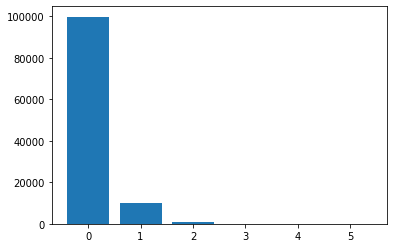

In [5]:
plt.bar(range(len(n_matches)), n_matches)
plt.show()

### This might look better on a logarithmic scale...

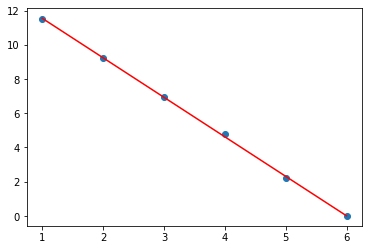

In [6]:
log_n_matches = np.log(n_matches)
xs = range(1, len(n_matches) + 1)
model = np.polyfit(xs, log_n_matches, 1)
predict = np.poly1d(model)
plt.scatter(xs, log_n_matches)
plt.plot(xs, predict(xs), c='r')
plt.show()

### Bam! great fit but wait, let's examine the slope.
As mentioned above, the equation of the number of matches is:

$$matches(seq)=arrayLength*P(seq)=arrayLength*0.1^n\\n=sequenceLength$$

Taking a $log$ from both sides yields:

$$\begin{align}
log(matches(seq))&=log(arrayLength)+log(P(seq)\\&=log(0.1)*n+log(arrayLength)
\end{align}$$

In [7]:
print(f'Using only the first all squences, exp(slope) = {np.exp(model[0]):.5f} (should be 0.1)')
print(f'Using only the first all squences, exp(intercept) = {int(np.exp(model[1]))} (should be {seq_len})')

Using only the first all squences, exp(slope) = 0.09935 (should be 0.1)
Using only the first all squences, exp(intercept) = 1046096 (should be 1000000)


## OMG! it worked!
The slope and intercept we got are not too far from the theoretical values.
The error comes from long sequences. Because their probability is very (very) low their number of matches will have high variance i.e. the difference between 1 and 2 matches out of 10,000,000 is large. The polynomial fit treats all points equally therefore an error in the long sequences will have a strong effect over the fit. I suppose this can be mitigated using some sort of weighted regression.

### Using only the first 3 sequences yields a better linear fit

In [8]:
model = np.polyfit(xs[:3], log_n_matches[:3], 1)
print(f'Using only the first 3 squences, exp(slope) = {np.exp(model[0]):.5f} (should be 0.1)')
print(f'Using only the first 3 squences, exp(intercept) = {int(np.exp(model[1]))} (should be {seq_len})')

Using only the first 3 squences, exp(slope) = 0.10197 (should be 0.1)
Using only the first 3 squences, exp(intercept) = 980287 (should be 1000000)
